In [1]:
!pip install -q -U autogluon.tabular

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.12.3 requires botocore<1.34.70,>=1.34.41, but you have botocore 1.29.165 which is incompatible.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.


In [2]:
from autogluon.tabular import TabularPredictor,TabularDataset
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import shutil
import pickle
import glob

warnings.filterwarnings('ignore')
seed = 27

# Loading the Dataset

In [3]:
train = pd.read_csv('/kaggle/input/flood-prediction-precomputed-stat-features/train.csv', index_col='id')

In [4]:
feats_to_drop = [
    '_sort_6', '_cnt17', 'Deforestation', 'Watersheds', '_std', '_cnt1', '_cnt12', 
    '_cnt16', '_cnt8', '_sort_9', 'RiverManagement', 'Encroachments', '_30th', '_10th', 
    '_min', 'DrainageSystems', '_sort_7', '_40th', '_sort_5', 'PoliticalFactors', 
    'ClimateChange', '_mode', 'Landslides', 'TopographyDrainage', 'PopulationScore'
]
train = train.drop(columns=feats_to_drop)

In [5]:
train = TabularDataset(train)

# Training

In [6]:
predictor = TabularPredictor(
    label='FloodProbability',
    eval_metric='r2',
    problem_type="regression",
    verbosity=2
).fit(
    train_data=train,
    time_limit=3600 * 11,
    presets="best_quality",
    excluded_model_types = ["NN_TORCH", "FASTAI", "NN"],
    save_space=False,
    hyperparameter_tune_kwargs={  
        'num_trials': 50,
        'scheduler' : 'local',
        'searcher'  : 'auto'
    },
#     feature_prune_kwargs={"force_prune": True}
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240530_170715"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 39600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240530_170715/ds_sub_fit/sub_fit_ho.
2024-05-30 17:07:16,505	INFO util.py:124 -- Outdated packages:
  ipywidgets==

  0%|          | 0/50 [00:00<?, ?it/s]

Will use sequential fold fitting strategy because import of ray failed. Reason: ray==2.9.0 detected. 2.10.0 <= ray < 2.11.0 is required. You can use pip to install certain version of ray `pip install ray==2.10.0` 
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 11. Best iteration is:
	[11]	valid_set's l2: 0.0011591	valid_set's r2: -81.3702
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 7. Best iteration is:
	[7]	valid_set's l2: 0.00123036	valid_set's r2: -81.4469
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 4. Best iteration is:
	[4]	valid_set's l2: 0.00189904	valid_set's r2: -83.113
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best itera

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 10. Best iteration is:
	[5]	valid_set's l2: 0.0017003	valid_set's r2: -81.4418
	Ran out of time, early stopping on iteration 9. Best iteration is:
	[5]	valid_set's l2: 0.0017091	valid_set's r2: -81.0112
	Ran out of time, early stopping on iteration 10. Best iteration is:
	[5]	valid_set's l2: 0.00169883	valid_set's r2: -81.4939
	Ran out of time, early stopping on iteration 11. Best iteration is:
	[11]	valid_set's l2: 0.00107633	valid_set's r2: -81.4051
	Ran out of time, early stopping on iteration 11. Best iteration is:
	[11]	valid_set's l2: 0.00107724	valid_set's r2: -81.1855
	Ran out of time, early stopping on iteration 12. Best iteration is:
	[11]	valid_set's l2: 0.00107703	valid_set's r2: -81.426
	Ran out of time, early stopping on iteration 12. Best iteration is:
	[11]	valid_set's l2: 0.00107409	valid_set's r2: -81.5317
	Ran out of time, early stoppi

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 17.
	Ran out of time, early stopping on iteration 21.
	Ran out of time, early stopping on iteration 22.
	Ran out of time, early stopping on iteration 23.
	Ran out of time, early stopping on iteration 24.
	Ran out of time, early stopping on iteration 26.
	Ran out of time, early stopping on iteration 28.
	Ran out of time, early stopping on iteration 33.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	0.7739	 = Validation score   (r2)
	83.92s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 92.71s of the 9562.47s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning XGBoost_BAG_L1... Skipping this model.
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 92.71s of the 9447.68s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 10. Best iteration is:
	[10]	valid_set's l2: 0.00157314	valid_set's r2: -81.4462
	Time limit exceeded..

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00237912	valid_set's r2: -91.8641
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00229617	valid_set's r2: -90.1952
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00237998	valid_set's r2: -90.3897
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00256823	valid_set's r2: -94.5587
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iterat

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00237531	valid_set's r2: -91.1892
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00229045	valid_set's r2: -89.8913
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00237565	valid_set's r2: -91.1892
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00256749	valid_set's r2: -94.5587
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iterat

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 11.
	Ran out of time, early stopping on iteration 12.
	Ran out of time, early stopping on iteration 16.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T1 ...
	0.2823	 = Validation score   (r2)
	66.66s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ... Tuning model for up to 76.92s of the 4904.58s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L2. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/auto

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning XGBoost_BAG_L2... Skipping this model.
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 76.92s of the 4784.71s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iteration is:
	[1]	valid_set's l2: 0.00246179	valid_set's r2: -94.4817
	Time limit exceeded... Skipping LightGBMLarge_BAG_L2.
Hyperparameter tuning model: CatBoost_r177_BAG_L2 ... Tuning model for up to 76.92s of the 4770.06s of remaining time.
	No hyperparameter search space specified for CatBoost_r177_BAG_L2. Skipping HPO. Will train one model based on th

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 75. Best iteration is:
	[62]	valid_set's l2: 0.00036702	valid_set's r2: -80.6802
	Ran out of time, early stopping on iteration 76. Best iteration is:
	[75]	valid_set's l2: 0.000360648	valid_set's r2: -81.0493
	Ran out of time, early stopping on iteration 80. Best iteration is:
	[80]	valid_set's l2: 0.000356912	valid_set's r2: -80.9788
	Ran out of time, early stopping on iteration 83. Best iteration is:
	[78]	valid_set's l2: 0.000360722	valid_set's r2: -81.2436
	Ran out of time, early stopping on iteration 87. Best iteration is:
	[84]	valid_set's l2: 0.000360614	valid_set's r2: -81.4329
	Ran out of time, early stopping on iteration 91. Best iteration is:
	[91]	valid_set's l2: 0.000357067	valid_set's r2: -81.6362
	Ran out of time, early stopping on iteration 100. Best iteration is:
	[100]	valid_set's l2: 0.000356708	valid_set's r2: -81.8362
	Ran out of tim

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	0.5859	 = Validation score   (r2)
	169.64s	 = Training   runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: RandomForestMSE_BAG_L1 ... Tuning model for up to 291.88s of the 30672.05s of remaining time.
	No hyperparameter search space specified for RandomForestMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/bagged_ensemble_model.py", line 1334, in _hyperparameter_tune
    hpo_executor.validate_search_space(search_space, self.name)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/hpo/executors.py", line 512, in validate_search_space
    raise EmptySearchSpace
autogluon.core.hpo.exceptions.EmptySearchSpace

During handling of the above exception, an

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 63.
	Ran out of time, early stopping on iteration 78.
	Ran out of time, early stopping on iteration 81.
	Ran out of time, early stopping on iteration 85.
	Ran out of time, early stopping on iteration 88.
	Ran out of time, early stopping on iteration 94.
	Ran out of time, early stopping on iteration 105.
	Ran out of time, early stopping on iteration 130.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	0.8653	 = Validation score   (r2)
	271.12s	 = Training   runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L1 ... Tuning model for up to 291.88s of the 30345.73s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
Fitted model: ExtraTreesMSE_BAG_L1 ...
	0.8673	 = Validation score   (r2)
	3

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	0.8404	 = Validation score   (r2)
	277.2s	 = Training   runtime
	0.01s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 291.88s of the 29761.38s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 46. Best iteration is:
	[21]	valid_set's l2: 0.000976954	valid_set's r2: -80.6808
	0.6213	 = Validation score   (r2)
	248.48s	 = Training   runtime
	2.25s	 = Validation runtime
Hyperparameter tuning model: CatBoost_r177_BAG_L1 ... Tuning model for up to 291.88s of the 29508.66s of remaining time.
	No hyperparameter search space specified for CatBoost_r177_BAG_L1. Skipping HPO. Will train one model based on the provided hyperparameters.
	Fitting 5 child models (S1F1 - S1F5) | Fitting with Sequent

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 11. Best iteration is:
	[11]	valid_set's l2: 0.00109093	valid_set's r2: -81.4285
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 13. Best iteration is:
	[13]	valid_set's l2: 0.00069897	valid_set's r2: -81.3359
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 9. Best iteration is:
	[9]	valid_set's l2: 0.00125842	valid_set's r2: -81.5823
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 4. Best iteration is:
	[1]	valid_set's l2: 0.00257368	valid_set's r2: -94.5072
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best it

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 14. Best iteration is:
	[11]	valid_set's l2: 0.00107316	valid_set's r2: -81.3317
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 9. Best iteration is:
	[9]	valid_set's l2: 0.000953256	valid_set's r2: -81.3548
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 6. Best iteration is:
	[6]	valid_set's l2: 0.00156404	valid_set's r2: -81.5965
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 3. Best iteration is:
	[1]	valid_set's l2: 0.0025733	valid_set's r2: -94.5072
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1. Best iter

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 26.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 1.
	Ran out of time, early stopping on iteration 28.
	Ran out of time, early stopping on iteration 28.
	Ran out of time, early stopping on iteration 29.
	Ran out of time, early stopping on iteration 29.
	Ran out of time, early stopping on iteration 32.
	Ran out of time, early stopping on iteration 32.
	Ran out of time, early stopping on iteration 37.
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T2 ...
	0.7802	 = Validation score   (r2)
	189.17s	 = Training   runtime
	0.01s	 = Validation runtime
Hyperparameter tuning model: ExtraTreesMSE_BAG_L2 ... Tuning model for up to 232.31s of the 15061.77s of remaining time.
	No hyperparameter search space specified for ExtraTreesMSE_BAG_L2. Skipping HPO. W

  0%|          | 0/50 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
No model was trained during hyperparameter tuning XGBoost_BAG_L2... Skipping this model.
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 232.31s of the 14788.94s of remaining time.
	Fitting 8 child models (S1F1 - S1F8) | Fitting with SequentialLocalFoldFittingStrategy
	Ran out of time, early stopping on iteration 12. Best iteration is:
	[12]	valid_set's l2: 0.00142867	valid_set's r2: -81.5944
	Time limit exceeded... Skipping LightGBMLarge_BAG_L2.
Hyperparameter tuning model: CatBoost_r177_BAG_L2 ...

In [7]:
X_train = train.drop('FloodProbability', axis=1)
y_train = train['FloodProbability']

y_preds = predictor.predict(X_train)

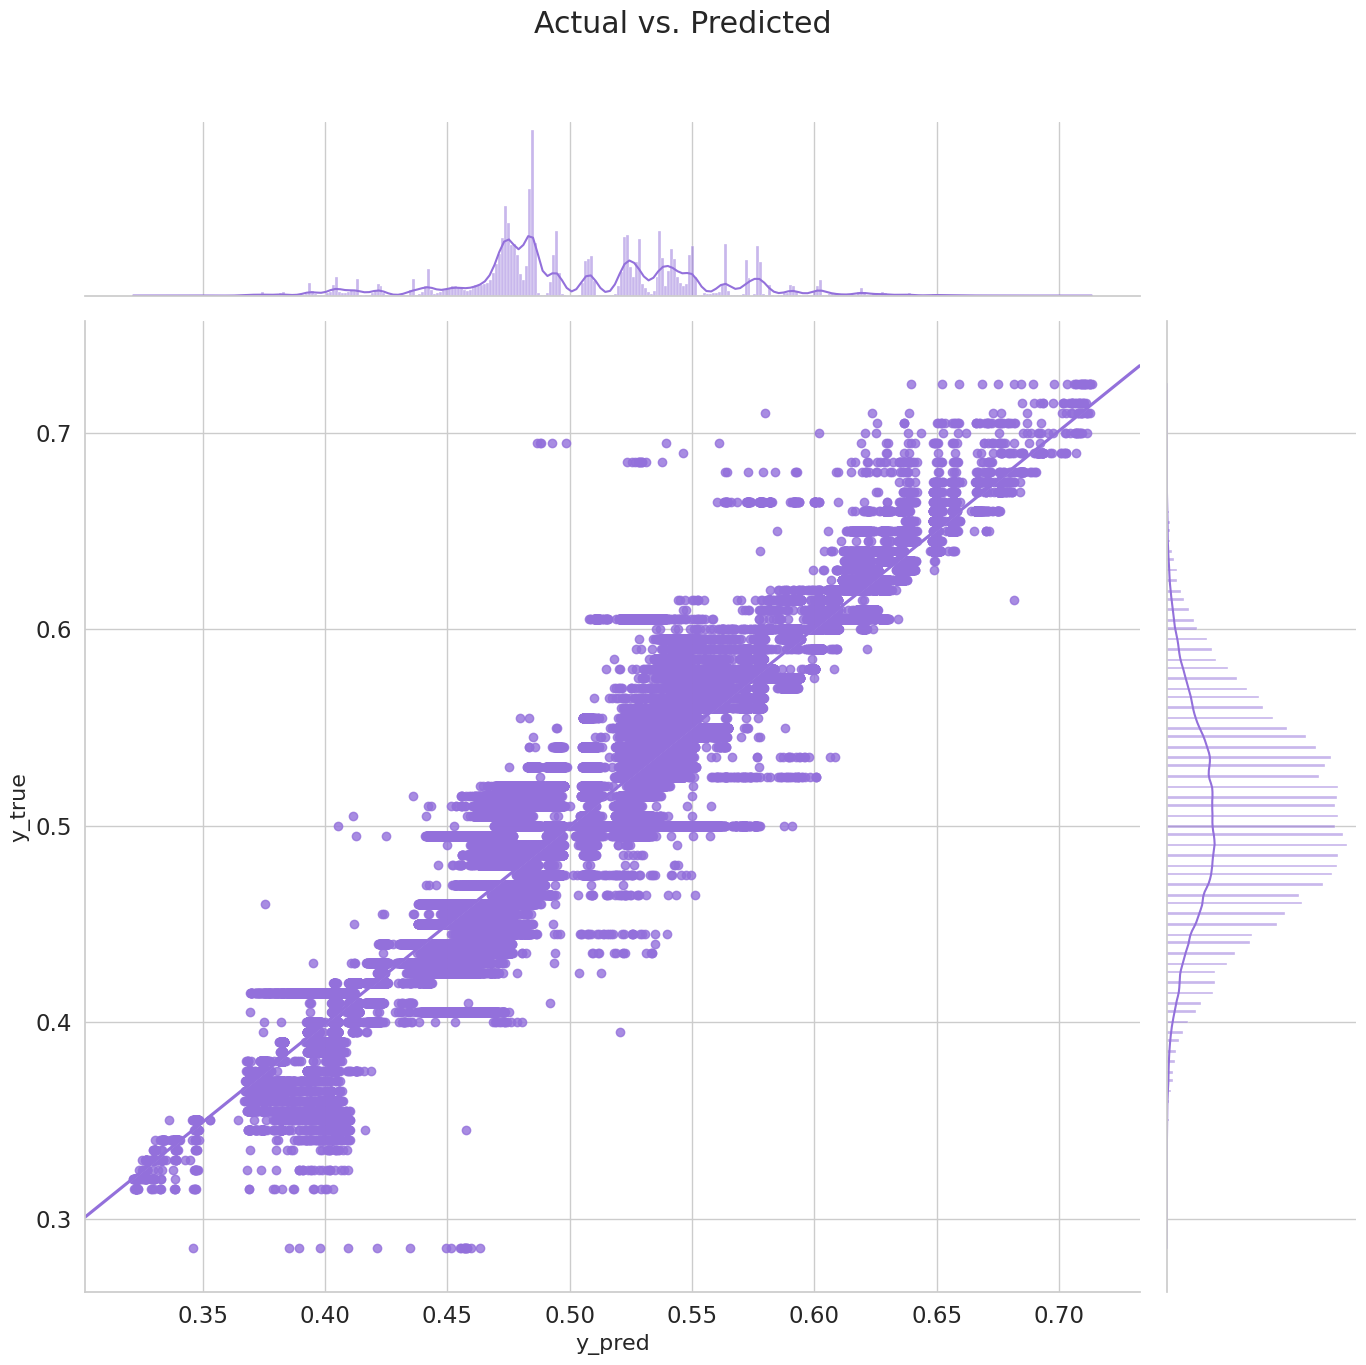

In [8]:
sns.set(style="whitegrid", font_scale=1.5)
g = sns.jointplot(
    x=y_preds,
    y=y_train,
    kind="reg",
    truncate=False,
    color='#9370DB',
    height=14,
)
g.set_axis_labels('y_pred', 'y_true', fontsize=16)
g.fig.suptitle("Actual vs. Predicted")
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)

## Selected Features
I set `feature_prune_kwargs={"force_prune": True}` in the `fit` method. Here I'm printing out the features that AutoGluon selected, as well as those that it decided to dropped.

In [9]:
model_path = glob.glob("/kaggle/working/AutogluonModels/**/**/**/model.pkl")[0]
with open(model_path, 'rb') as f:
    model = pickle.load(f)

selected_features = model.features
unused_features = [col for col in train.columns if col not in selected_features and col != "FloodProbability"]

print("Unused Features:", unused_features)
print("\nSelected Features:", selected_features)

Unused Features: ['_sort_19', '_50th', '_cnt19', '_cnt22']

Selected Features: ['LightGBMXT_BAG_L1/T1', 'LightGBM_BAG_L1/T1', 'CatBoost_BAG_L1/T1', 'ExtraTreesMSE_BAG_L1', 'XGBoost_BAG_L1/T1', 'LightGBMLarge_BAG_L1', 'CatBoost_r177_BAG_L1', 'LightGBM_r131_BAG_L1', 'CatBoost_r9_BAG_L1', 'LightGBM_r96_BAG_L1', 'XGBoost_r33_BAG_L1', 'ExtraTrees_r42_BAG_L1', 'CatBoost_r137_BAG_L1', 'CatBoost_r13_BAG_L1', 'LightGBM_r188_BAG_L1', 'XGBoost_r89_BAG_L1', 'LightGBM_r130_BAG_L1', 'CatBoost_r50_BAG_L1', 'XGBoost_r194_BAG_L1', 'ExtraTrees_r172_BAG_L1', 'CatBoost_r69_BAG_L1', 'LightGBM_r161_BAG_L1', 'CatBoost_r70_BAG_L1', 'LightGBM_r196_BAG_L1', 'CatBoost_r167_BAG_L1', 'XGBoost_r98_BAG_L1', 'LightGBM_r15_BAG_L1', 'CatBoost_r86_BAG_L1', 'CatBoost_r49_BAG_L1', 'LightGBM_r143_BAG_L1', 'LightGBM_r94_BAG_L1', 'CatBoost_r128_BAG_L1', 'ExtraTrees_r4_BAG_L1', 'LightGBM_r30_BAG_L1', 'XGBoost_r49_BAG_L1', 'CatBoost_r5_BAG_L1', 'CatBoost_r143_BAG_L1', 'ExtraTrees_r178_BAG_L1', 'XGBoost_r31_BAG_L1', 'CatBoost_r

# Making Predictions and Creating a Submission File

In [10]:
# Used for ensembling with other models
oof_predictions = predictor.get_oof_pred_proba()
with open('autogluon_oof_preds.pkl', 'wb') as f:
    pickle.dump(oof_predictions, f)

In [11]:
test = pd.read_csv('/kaggle/input/flood-prediction-precomputed-stat-features/test.csv', index_col='id')
test = test.drop(columns=feats_to_drop)
test = TabularDataset(test)

preds = predictor.predict(test)

In [12]:
submission = pd.DataFrame({'id': test.index, 'FloodProbability': preds})
submission.to_csv('autogluon.csv', index=False)
submission.head()

,id,FloodProbability
id,,
1117957,1117957,0.577997
1117958,1117958,0.454938
1117959,1117959,0.448270
1117960,1117960,0.466228
1117961,1117961,0.466026


In [13]:
shutil.rmtree("AutogluonModels")